<a href="https://colab.research.google.com/github/MariaPetrovskaya/Natural-Language-Processing-technologies-overview/blob/main/Word2vec/%20Word_Embeddings_and_Word2Vec%C2%A0t_SNE_visualizing_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Embeddings and Word2Vec t-SNE visualizing, sample from educational and open-sourse materials

## Word Embeddings
To train our own little embeddings, load one from gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh` , but only if you're running locally.

https://github.com/yandexdataschool/nlp_course/tree/2023/week01_embeddings

In [1]:
! pip install gensim #этот импорт надо делать первым, иначе библиотеки степика с ним как-то конфликтуют

In [2]:
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
import multiprocessing

from gensim.models import Word2Vec

In [4]:
from gensim import models

In [5]:
from gensim.utils import keep_vocab_item, call_on_class_only, deprecated
from gensim.models.keyedvectors import KeyedVectors, pseudorandom_weak_vector
from gensim import utils, matutils

# This import is required by pickle to load models stored by Gensim < 4.0, such as Gensim 3.8.3.
from gensim.models.keyedvectors import Vocab  # noqa

In [6]:
import gensim.downloader as api

In [7]:
pip install nltk

In [8]:
from nltk.tokenize import WordPunctTokenizer

In [9]:
import numpy as np

In [10]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2024-04-18 07:12:37--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2024-04-18 07:12:38--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5467bfe93ceaabfd9bc8777864.dl.dropboxusercontent.com/cd/0/get/CROPPOLKa0CRnlzGzUrcFgBGSVSzpV_u-qiMNOyb7MWGdXWO8K6Xl1AnTWdghIh1XpYv9vagVMXZP5Opfu8Wadvi4ZQx67p-ikdHH7Rjm1o2sKjmNULgfaBxnM9nrc6_e8k/file?dl=1# [following]
--2024-04-18 07:12:38--  https://uc5467bfe93ceaabfd9bc8777864.dl.dropboxusercontent.com/cd/0/get/CROPPOLKa0CRnlzGzUrcFgBGSVSzpV_u-qiMNOyb7MWGdXWO8K6Xl1AnTWdghIh1XpYv9vagVMXZP5Opfu8Wadvi4ZQx67p-ikdHH7Rjm1o2sKjmNULgfaBxnM9nrc6_e8

In [11]:


with open("./quora.txt", encoding="utf-8") as file:
    data = list(file)

data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an NLP task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and smiles attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many NLP tasks like tokenization, stemming or part-of-speech tagging.

In [12]:
# from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [13]:
# TASK: lowercase everything and extract tokens with tokenizer.
# data_tok should be a list of lists of tokens for each line in data.

data_tok = [tokenizer.tokenize(x.lower ()) for x in data]

In [14]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [15]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fasttext that uses character-level models to train word embeddings.

The choice is huge, so let's start someplace small: __gensim__ is another nlp library that features many vector-based models incuding word2vec.

In [16]:
# from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [17]:
# now you can get word vectors !
model.get_vector('anything')

array([-3.8391962 ,  1.8424283 ,  1.4691999 ,  1.5103202 ,  2.4523823 ,
        1.9861023 ,  2.0852516 , -1.195795  , -0.0776324 ,  0.8421004 ,
       -1.4113492 ,  2.370913  ,  3.6524158 ,  2.6153162 ,  1.3462597 ,
       -2.692859  , -0.36456522, -1.7780213 ,  1.0081943 , -3.4263048 ,
       -3.486233  , -0.00718972, -1.4401921 , -0.18877757,  1.0040833 ,
       -2.9398887 , -2.9995327 ,  0.05203247, -0.45312232,  2.0173357 ,
       -0.09857468, -0.50161546], dtype=float32)

In [18]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.9464487433433533),
 ('fruit', 0.9409018158912659),
 ('butter', 0.9283658266067505),
 ('pasta', 0.9212655425071716),
 ('beer', 0.9139191508293152),
 ('cheese', 0.9130353927612305),
 ('sauce', 0.9125888347625732),
 ('flour', 0.9120796918869019),
 ('beans', 0.904575526714325),
 ('banana', 0.8962019681930542)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: wikipedia articles or twitter posts.

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code.

In [19]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [20]:
api.info() #about models in gensim

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [21]:
#model.vocab #to look vocab
model.key_to_index

{'<user>': 0,
 '.': 1,
 ':': 2,
 'rt': 3,
 ',': 4,
 '<repeat>': 5,
 '<hashtag>': 6,
 '<number>': 7,
 '<url>': 8,
 '!': 9,
 'i': 10,
 'a': 11,
 '"': 12,
 'the': 13,
 '?': 14,
 'you': 15,
 'to': 16,
 '(': 17,
 '<allcaps>': 18,
 '<elong>': 19,
 ')': 20,
 'me': 21,
 'de': 22,
 '<smile>': 23,
 '！': 24,
 'que': 25,
 'and': 26,
 '。': 27,
 '-': 28,
 'my': 29,
 'no': 30,
 '、': 31,
 'is': 32,
 'it': 33,
 '…': 34,
 'in': 35,
 'n': 36,
 'for': 37,
 '/': 38,
 'of': 39,
 'la': 40,
 "'s": 41,
 '*': 42,
 'do': 43,
 "n't": 44,
 'that': 45,
 'on': 46,
 'y': 47,
 "'": 48,
 'e': 49,
 'o': 50,
 'u': 51,
 'en': 52,
 'this': 53,
 'el': 54,
 'so': 55,
 'be': 56,
 "'m": 57,
 'with': 58,
 'just': 59,
 '>': 60,
 'your': 61,
 '^': 62,
 'like': 63,
 'have': 64,
 'te': 65,
 'at': 66,
 '？': 67,
 'love': 68,
 'se': 69,
 'are': 70,
 '<': 71,
 'm': 72,
 'r': 73,
 'if': 74,
 'all': 75,
 'b': 76,
 '・': 77,
 'not': 78,
 'but': 79,
 'we': 80,
 'es': 81,
 'ya': 82,
 '&': 83,
 'follow': 84,
 'up': 85,
 'what': 86,
 'get': 87

In [22]:
#model.syn0 #to look vocab
model.index_to_key

['<user>',
 '.',
 ':',
 'rt',
 ',',
 '<repeat>',
 '<hashtag>',
 '<number>',
 '<url>',
 '!',
 'i',
 'a',
 '"',
 'the',
 '?',
 'you',
 'to',
 '(',
 '<allcaps>',
 '<elong>',
 ')',
 'me',
 'de',
 '<smile>',
 '！',
 'que',
 'and',
 '。',
 '-',
 'my',
 'no',
 '、',
 'is',
 'it',
 '…',
 'in',
 'n',
 'for',
 '/',
 'of',
 'la',
 "'s",
 '*',
 'do',
 "n't",
 'that',
 'on',
 'y',
 "'",
 'e',
 'o',
 'u',
 'en',
 'this',
 'el',
 'so',
 'be',
 "'m",
 'with',
 'just',
 '>',
 'your',
 '^',
 'like',
 'have',
 'te',
 'at',
 '？',
 'love',
 'se',
 'are',
 '<',
 'm',
 'r',
 'if',
 'all',
 'b',
 '・',
 'not',
 'but',
 'we',
 'es',
 'ya',
 '&',
 'follow',
 'up',
 'what',
 'get',
 'lol',
 'un',
 '♥',
 'lo',
 'when',
 'was',
 '“',
 '”',
 'one',
 'por',
 'si',
 'out',
 '_',
 'mi',
 'can',
 '<sadface>',
 'من',
 '♡',
 '´',
 'he',
 'con',
 'they',
 'now',
 'go',
 '،',
 'para',
 'los',
 'know',
 'haha',
 'good',
 'tu',
 'back',
 '~',
 'about',
 'new',
 ';',
 'as',
 'day',
 'how',
 'who',
 'will',
 'want',
 'people',
 'y

In [23]:
model.most_similar(positive=["coder", "money"], negative=["brain"])#joke calculation : what it may be: coder with money but w/o brain

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.4922019839286804),
 ('shopper', 0.4920562207698822),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452522277832)]

In [24]:
model.most_similar(positive=["coder", "money"], negative=["job"])

[('adder', 0.582488477230072),
 ('fiend', 0.5375850200653076),
 ('second-hand', 0.49005433917045593),
 ('necessities', 0.48518475890159607),
 ('blenders', 0.47918105125427246),
 ('millionaire', 0.47857365012168884),
 ('ekso', 0.47364410758018494),
 ('moneeey', 0.4688074588775635),
 ('monney', 0.46865737438201904),
 ('stashed', 0.4661729037761688)]

### Visualizing word vectors

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.


### Visualizing Word2Vec Word Embeddings using t-SNE


In [25]:
import gensim

model_gn = model

In [26]:
model_gn


In [27]:
keys = [ 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [28]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

<ipython-input-29-613517dac1a8>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


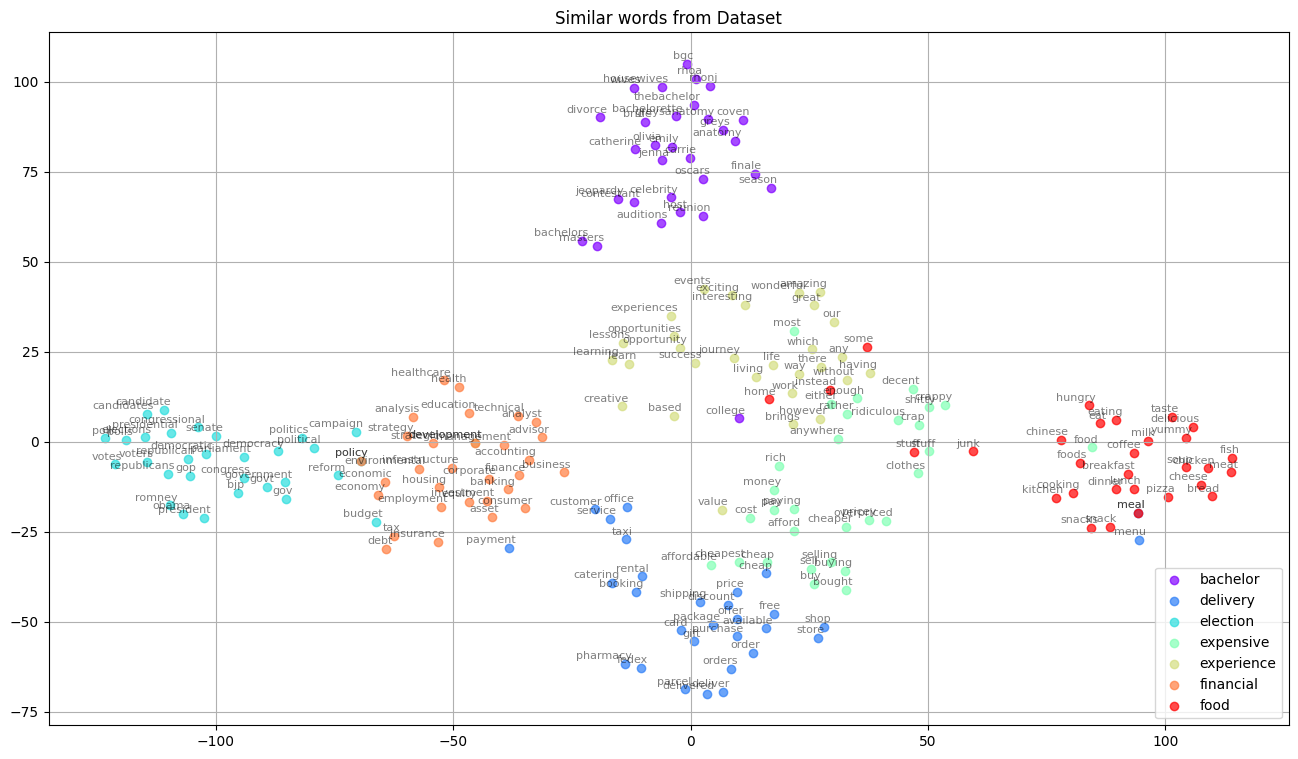

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Dataset', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')